<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Scikit-learn" data-toc-modified-id="Scikit-learn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Scikit-learn</a></span><ul class="toc-item"><li><span><a href="#Transforming-the-outcome/target" data-toc-modified-id="Transforming-the-outcome/target-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Transforming the outcome/target</a></span></li><li><span><a href="#Transforming-the-predictors" data-toc-modified-id="Transforming-the-predictors-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Transforming the predictors</a></span></li></ul></li><li><span><a href="#The-methods" data-toc-modified-id="The-methods-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The methods</a></span><ul class="toc-item"><li><span><a href="#A-quick-example" data-toc-modified-id="A-quick-example-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>A quick example</a></span></li></ul></li><li><span><a href="#A-data-analytic-example" data-toc-modified-id="A-data-analytic-example-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>A data analytic example</a></span><ul class="toc-item"><li><span><a href="#Visualizing-a-decision-tree" data-toc-modified-id="Visualizing-a-decision-tree-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visualizing a decision tree</a></span></li><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cross-validation</a></span></li><li><span><a href="#Improving-models-through-cross-validation" data-toc-modified-id="Improving-models-through-cross-validation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Improving models through cross-validation</a></span></li><li><span><a href="#Feature-selection" data-toc-modified-id="Feature-selection-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Feature selection</a></span></li></ul></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Unsupervised-learning" data-toc-modified-id="Unsupervised-learning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Unsupervised learning</a></span></li></ul></div>

# Machine Learning using Python

## Scikit-learn

Scikit-learn (`sklearn`) is the main Python package for machine learning. It is a widely-used and well-regarded package. However, there are a couple of challenges to using it given the usual `pandas`-based data munging pipeline. 

1. `sklearn` requires that all inputs be numeric, and in fact, `numpy` arrays.
1. `sklearn` requires that all categorical variables by replaced by 0/1 dummy variables
1. `sklearn` requires us to separate the predictors from the outcome. We need to have one `X` matrix for the predictors and one `y` vector for the outcome.

The big issue, of course, is the first point. Given we used `pandas` precisely because we wanted to be able to keep heterogenous data. We have to be able to convert non-numeric data to numeric. `pandas` does help us out with this problem. 

1. First of all, we know that all `pandas` Series and DataFrame objects can be converted to `numpy` arrays using the `values` or `to_numpy` functions. 
1. Second, we can easily extract a single variable from the data set using either the usual extracton methods or the 
`pop` function. 
1. Third, `pandas` gives us a way to convert all categorical values to numeric dummy variables using the `get_dummies` function. This is actually a more desirable solution than what you will see in cyberspace, which is to use the 
`OneHotEncoder` function from `sklearn`. 
    + This is generally fine since many machine learning models look for interactions internally and don't need them to be overtly specified. The main exceptions to this are linear and logistic regression. For those, we can use the formula methods described in the Statistical Modeling module to generate the appropriately transformed design matrix.
    + If the outcome variable is not numeric, we can `LabelEncoder` function from the `sklearn.preprocessing` submodule to convert it. 

I just threw a bunch of jargon at you. Let's see what this means.

### Transforming the outcome/target

In [1]:
import numpy as np
import pandas as pd
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

iris = sm.datasets.get_rdataset('iris').data
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's hit the first issue first. We need to separate out the outcome (the variable we want to predict) from the predictors (in this case the sepal and petal measurements). 

In [2]:
y = iris['Species']
X = iris.drop('Species', axis = 1) # drops column, makes a copy

Another way to do this is 

In [3]:
y = iris.pop('Species')

If you look at this, `iris` now only has 4 columns. So we could just use `iris` after the `pop` application, as the predictor set

We still have to update `y` to become numeric. This is where the `sklearn` functions start to be handy

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Let's talk about this code, since it's very typical of the way the `sklearn`
code works. First, we import a method (`LabelEncoder`) from the appropriate
`sklearn` module. The second line, `le = LabelEncoder()` works to "turn on" the
method. This is like taking a power tool off the shelf and plugging it in to a
socket. It's now ready to work. The third line does the actual work.  The
`fit_transform` function transforms the data you input into it based on the
method it is then attached to.

> Let's make a quick analogy. You can plug in both a power washer and a
jackhammer to get them ready to go. You can then apply each of them to your
driveway. They "transform" the driveway in different ways depending on which
tool is used. The washer would "transform" the driveway by cleaning it, while
the jackhammer would transform the driveway by breaking it.

There's an interesting invisible quirk to the code, though. The object `le` also got transformed during this 
process. There were pieces added to it during the `fit_transform` process. 

In [5]:
le = LabelEncoder()
d1 = dir(le)

In [6]:
y = le.fit_transform( pd.read_csv('data/iris.csv')['species'])
d2 = dir(le)
set(d2).difference(set(d1)) # set of things in d2 but not in d1

FileNotFoundError: [Errno 2] No such file or directory: 'data/iris.csv'

So we see that there is a new component added, called `classes_`. 

In [7]:
le.classes_

AttributeError: 'LabelEncoder' object has no attribute 'classes_'

So the original labels aren't destroyed; they are being stored. This can be useful.

In [8]:
le.inverse_transform([0,1,1,2,0])

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

So we can transform back from the numeric to the labels. Keep this in hand, since it will prove useful after
we have done some predictions using a ML model, which will give numeric predictions. 

### Transforming the predictors

Let's look at a second example. The `diamonds` dataset has several categorical variables that would need to be transformed. 

In [9]:
diamonds = pd.read_csv('data/diamonds.csv.gz')

y = diamonds.pop('price').values
X = pd.get_dummies(diamonds)

# Alternatively
# import patsy
# f = '~ np.log(carat) +  + clarity + depth + cut * color'
# X = patsy.dmatrix(f, data=diamonds)

FileNotFoundError: [Errno 2] No such file or directory: 'data/diamonds.csv.gz'

In [10]:
type(X)

pandas.core.frame.DataFrame

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


So everything is now numeric!!. Let's take a peek inside.

In [12]:
X.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], dtype='object')

So, it looks like the continuous variables remain intact, but the categorical variables got exploded out. Each
variable name has a level with it, which represents the particular level it is representing. Each of these 
variables, called dummy variables, are numerical 0/1 variables. For example, `color_F` is 1 for those diamonds which have color F, and 0 otherwise. 

In [13]:
pd.crosstab(X['color_F'], diamonds['color'])

KeyError: 'color_F'

## The methods

We will first look at supervised learning methods. 

| ML method               | Code to call it                                              |
| ----------------------- | ------------------------------------------------------------ |
| Decision Tree           | `sklearn.tree.DecisionTreeClassifier`, `sklearn.tree.DecisionTreeRegressor` |
| Random Forest           | `sklearn.ensemble.RandomForestClassifier`, `sklearn.ensemble.RandomForestRegressor` |
| Linear Regression       | `sklearn.linear_model.LinearRegression`                      |
| Logistic Regression     | `sklearn.linear_model.LogisticRegression`                    |
| Support Vector Machines | `sklearn.svm.LinearSVC`, `sklearn.svm.LinearSVR`             |
|                         |                                                              |

The general method that the code will follow is :

```
from sklearn.... import Machine
machine = Machine(*parameters*)
machine.fit(X, y)
```

### A quick example

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lm = LinearRegression()
dt = DecisionTreeRegressor()

Lets manufacture some data

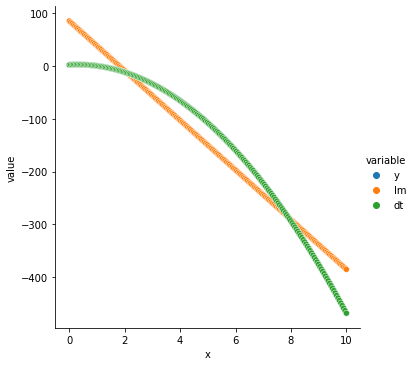

In [15]:
x = np.linspace(0, 10, 200)
y = 2 + 3*x - 5*(x**2)
d = pd.DataFrame({'x': x})

lm.fit(d,y)
dt.fit(d, y)

p1 = lm.predict(d)
p2 = dt.predict(d)

d['y'] = y
d['lm'] = p1
d['dt'] = p2

D = pd.melt(d, id_vars = 'x')

sns.relplot(data=D, x = 'x', y = 'value', hue = 'variable')
plt.show()

## A data analytic example

In [16]:
diamonds = pd.read_csv('data/diamonds.csv.gz')
diamonds.info()

FileNotFoundError: [Errno 2] No such file or directory: 'data/diamonds.csv.gz'

First, lets separate out the outcome (price) and the predictors

In [17]:
y = diamonds.pop('price')

NameError: name 'diamonds' is not defined

For many machine learning problems, it is useful to scale the numeric predictors so that they have mean 0 and 
variance 1. First we need to separate out the categorical and numeric variables

In [18]:
d1 = diamonds.select_dtypes(include = 'number')
d2 = diamonds.select_dtypes(exclude = 'number')

NameError: name 'diamonds' is not defined

Now let's scale the columns of `d1`

In [19]:
from sklearn.preprocessing import scale

bl = scale(d1)
bl

ValueError: could not convert string to float: '__class__'

Woops!! We get a `numpy` array, not a `DataFrame`!!

In [20]:
bl = pd.DataFrame(scale(d1))
bl.columns = list(d1.columns)
d1 = bl

ValueError: could not convert string to float: '__class__'

Now, let's recode the categorical variables into dummy variables.

In [21]:
d2 = pd.get_dummies(d2)

NameError: name 'd2' is not defined

and put them back together

In [22]:
X = pd.concat([d1,d2], axis = 1)

NameError: name 'd2' is not defined

Next we need to split the data into a training set and a test set. Usually we do this as an 80/20 split. 
The purpose of the test set is to see how well the model works on an "external" data set. We don't touch the 
test set until we're done with all our model building in the training set. We usually do the split using 
random numbers. We'll put 40,000 observations in the training set.


In [23]:
ind = list(X.index)
np.random.shuffle(ind)

X_train, y_train = X.loc[ind[:40000],:], y[ind[:40000]]
X_test, y_test = X.loc[ind[40000:],:], y[ind[40000:]]

There is another way to do this

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state= 40)

ValueError: Found input variables with inconsistent numbers of samples: [150, 200]

Now we will fit our models to the training data. Let's use a decision tree model, a random forest model, and a linear regression.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lm = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

Now we will use our training data to fit the models

In [26]:
lm.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor()

We now need to see how well the model fit the data. We'll use the R2 statistic to be our metric of choice to evaluate the model fit.

In [27]:
from sklearn.metrics import  r2_score

f"""
Linear regression: {r2_score(y_train, lm.predict(X_train))}, 
Decision tree: {r2_score(y_train, dt.predict(X_train))},
Random Forest: {r2_score(y_train, rf.predict(X_train))}
"""



'\nLinear regression: 0.7147558006729153, \nDecision tree: 0.9921343389631239,\nRandom Forest: 0.9532837468828566\n'

This is pretty amazing. However, we know that if we try and predict using the same data we used to train 
the model, we get better than expected results. One way to get a better idea about the true performance of the 
model when we will try it on external data is to do cross-validation. 

### Visualizing a decision tree

**scikit-learn** provides a decent way of visualizing a decision tree using a program called _Graphviz_, which is a dedicated graph and network visualization program.

In [28]:
import graphviz
from sklearn import tree

dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_train)
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names = X_train.columns,
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data);
graph

ModuleNotFoundError: No module named 'graphviz'

Alternatively,

In [29]:
tree.plot_tree(dt);

NameError: name 'tree' is not defined

### Cross-validation

In cross-validation, we split the dataset up into 5  equal parts randomly. We then train the 
model using 4 parts and predict the data on the 5th part. We do for all possible groups of 4 parts. We then 
consider the overall performance of prediction. 

![](graphs/CV5.png)

There is nothing special about the 5 splits. If you use 5 splits, it is called 5-fold cross-validation (CV), if you use 10 splits, it is 10-fold CV. If you use all but one subject as training data, and that one subject as test data, and cycle through all the subjects, that is called leave-one-out CV (LOOCV). All these methods are widely used, but 5- and 10-fold CV are often used as a balance between effectiveness and computational efficiency. 

**scikit-learn** makes this pretty easy, using the `cross_val_score` function. 

In [30]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(dt, X_train, y_train, cv=5, scoring='r2')
f"CV error = {np.round(np.mean(cv_score), 3)}"

'CV error = 0.484'

### Improving models through cross-validation

The cross-validation error, as we've seen, gives us a better estimate of 
how well our model predicts on new data. We can use this to tune models by tweaking their parameters to get models that reasonably will perform better. 

Each model that we fit has a set of parameters that govern how it proceeds
to fit the data. These can bee seen using the `get_params` function. 

In [31]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [32]:
le.get_params()

{}

> Linear regression is entirely determined by the functional form of 
the prediction equation,i.e., the "formula" we use. It doesn't have any parameters to tune per se. Improving a linear regression involves playing 
with the different predictors and transforming them to improve the predictions. This involve subjects called _regression diagnostics_ and 
_feature engineering_ that we will leave to Google for now. 

We can tune different parameters for the decision tree to try and see if
some combination of parameters can improve predictions. One way to do this,
since we're using a computer, is a grid search. This means that we can set out sets of values of the parameters we want to tune, and the computer will go through every combination of those values to see how the model
performs, and will provide the "best" model. 

We would specify the values as a dictionary to the function `GridSearchCV`, which would optimize based on the cross-validation error. 

In [33]:
from sklearn.model_selection import GridSearchCV
import numpy.random as rnd
rnd.RandomState(39358)

param_grid = {'max_depth': [1,3,5,7, 10], 'min_samples_leaf': [1,5,10,20],
  'max_features' : ['auto','sqrt']}

clf = GridSearchCV(dt, param_grid, scoring = 'r2', cv = 5) # Tuning dt
clf.fit(X_train, y_train)

clf.best_estimator_
print(clf.best_score_)

0.7184901366983298


So how does this do on the test set?

In [34]:
p = clf.best_estimator_.predict(X_test)
r2_score(y_test, p)

ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required.

So this predictor is doing slightly better on the test set than the training set. This is often an indicator that the model is overfitting on the data. This is probable here, given the extremely high R2 values for this model. 

### Feature selection

We can also use cross-validation to do recursive feature selection (or 
backwards elimination), based on a predictive score. This is different 
from usual stepwise selection methods which are based on a succession of 
hypothesis tests. 

In [35]:
from sklearn.feature_selection import RFECV

selector = RFECV(lm, cv = 5, scoring = 'r2')
selector = selector.fit(X_train, y_train)
selector.support_


array([False, False, False,  True])

The support gives the set of predictors (True) that are finally selected.

In [36]:
X_train.columns[selector.support_]


Index(['Petal.Width'], dtype='object')

This is indicating that the best predictive model for the linear regression includes carat, cut, color and clarity, and width of the stone.

## Logistic regression

We noted that logistic regression is available both through **statsmodels** and through **scikit-learn**. Let's now try to fit a 
logistic regression model using **scikit-learn**. We will use the same
Titanic dataset we used earlier. 

In [37]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

titanic = sm.datasets.get_rdataset('Titanic','Stat2Data').data.dropna()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      756 non-null    object 
 1   PClass    756 non-null    object 
 2   Age       756 non-null    float64
 3   Sex       756 non-null    object 
 4   Survived  756 non-null    int64  
 5   SexCode   756 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 41.3+ KB


We will model `Survived` on the age, sex and passenger class of passengers. 

In [38]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(titanic[['Age','Sex','PClass']], drop_first=True)
y = titanic.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state= 40) # 80/20 split

lrm = LogisticRegression()
lrm.fit(X_train, y_train)


LogisticRegression()

There are a few differences that are now evident between this model and
the model we fit using **statsmodels**. As a reminder, we fit this model again below.

In [39]:
titanic1 = titanic.loc[X_train.index,:]
titanic2 = titanic.loc[X_test.index,:]
mod_logistic = smf.glm('Survived ~ Age + Sex + PClass', data=titanic1,
  family = sm.families.Binomial()).fit()
mod_logistic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  604
Model:                            GLM   Df Residuals:                      599
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -282.34
Date:                Wed, 15 Sep 2021   Deviance:                       564.68
Time:                        22:46:07   Pearson chi2:                     666.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.6795      0.440      8.362      0.000       2.817       4.542
Sex[T.male]      -2.5138      0.221    -11.353      0.000      -2.948      -2.080
PClass[T.2nd]    -1.2057      0.290     -4.155      0.000      -1.774      -0.637
PClass[T.3rd]    -2.5974      0.305     -8.528      0.000      -3.194      -2.000
Age              -0.0367      0.008     -4.385      0.000      -0.053      -0.020
=================================================================================
"""

We can see the objects that are available to us from the two models using 
`dir(lrm)` and `dir(mod_logistic)`. We find that `lrm` does not give us
any parameter estimates, p-values or summary methods. It is much leaner, and, in line with other machine learning models, emphasizes predictions. So if you want to find associations between predictors and outcome, you will have to use the **statsmodels** version. 

Let's compare the predictions. 

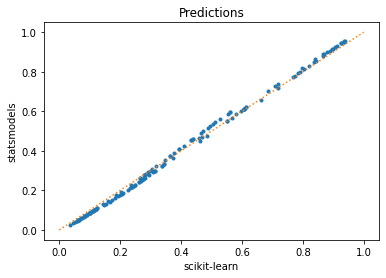

In [40]:
plt.clf()
p1 = lrm.predict_proba(X_test)[:,1]
p2 = mod_logistic.predict(titanic2)

plt.plot(p1, p2, '.');
plt.plot([0,1],[0,1], ':');
plt.xlabel('scikit-learn');
plt.ylabel('statsmodels');
plt.title('Predictions');
plt.show()


First note that the prediction functions work a bit differently. For `lrm` we have to explicitly ask for the probability predictions, whereas those are automatically provided for `mod_logistic`. We also find that the predictions aren't exactly the same. This is because `lrm`, by default, runs a penalized regression using the lasso criteria (L2 norm), rather than the non-penalized version that `mod_logistic` runs. We can specify no penalty for `lrm` and can see much closer agreement between the two models.

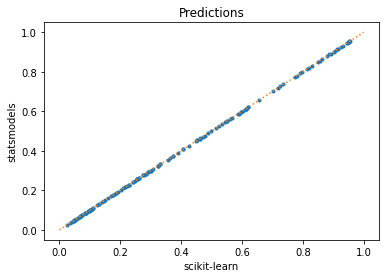

In [41]:
lrm = LogisticRegression(penalty='none')
lrm.fit(X_train, y_train)
p1 = lrm.predict_proba(X_test)[:,1]

plt.clf()
plt.plot(p1, p2, '.');
plt.plot([0,1],[0,1], ':');
plt.xlabel('scikit-learn');
plt.ylabel('statsmodels');
plt.title('Predictions');
plt.show()


## Unsupervised learning

Unsupervised learning is a class of machine learning methods where we are just trying to identify patterns in the data without any labels. This is in contrast to _supervised learning_, which are the modeling methods we have discussed above. 

Most unsupervised learning methods fall broadly into a set of algorithms called _cluster analysis_. **scikit-learn** provides several clustering algorithms. 

![](graphs/cluster_choice.png)

We will demonstrate the two more popular choices -- K-Means and Agglomerative clustering (also known as hierarchical clustering). We will use the classic Fisher's Iris data for this demonstration.

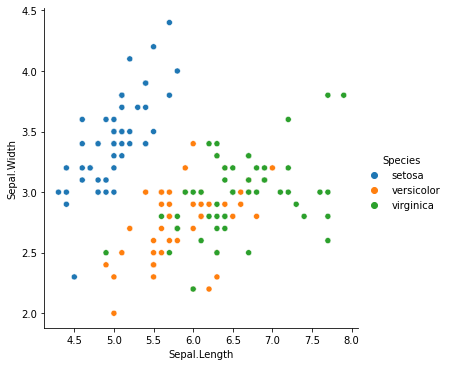

In [42]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering

iris = sm.datasets.get_rdataset('iris').data
sns.relplot(data=iris, x = 'Sepal.Length',y = 'Sepal.Width', hue = 'Species');

The K-Means algorithm takes a pre-specified number of clusters as input, and then tries to find contiguous regions of the data to parse into clusters. 

In [43]:
km = KMeans(n_clusters = 3)
km.fit(iris[['Sepal.Length','Sepal.Width']]);

In [44]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

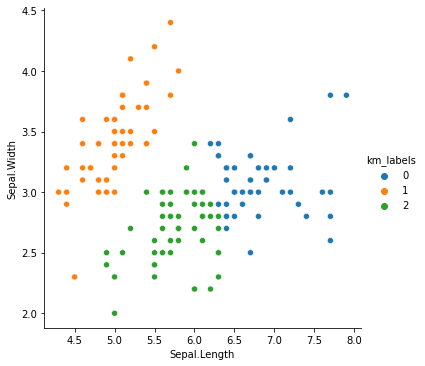

In [45]:
iris['km_labels'] = km.labels_
iris['km_labels'] = iris.km_labels.astype('category')

sns.relplot(data=iris, x = 'Sepal.Length', y = 'Sepal.Width', 
           hue = 'km_labels');

Agglomerative clustering takes a different approach. It starts by coalescing individual points successively, based on a distance metric and a principle for how to coalesce groups of points (called _linkage_). The number of clusters can then be determined either visually or via different cutoffs. 

In [46]:
hc = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                             linkage='complete')

hc.fit(iris[['Sepal.Length','Sepal.Width']])


AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [47]:
hc.linkage

'complete'

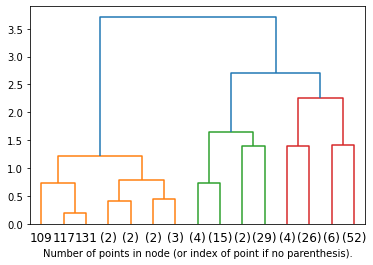

In [48]:
from scipy.cluster.hierarchy import dendrogram

## The following is from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(hc, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


In [49]:
hc = AgglomerativeClustering( n_clusters=3,
                             linkage='average')

hc.fit(iris[['Sepal.Length','Sepal.Width']]);


In [50]:
hc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

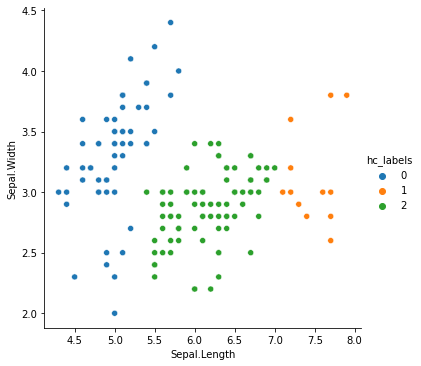

In [51]:
iris['hc_labels'] = pd.Series(hc.labels_).astype('category')

sns.relplot(data=iris, x = 'Sepal.Length', y= 'Sepal.Width', 
           hue = 'hc_labels');

> Play around with different linkage methods to see how these clusters change. 